In [166]:
import pandas as pd
import numpy as np

data = pd.read_csv('Raw_Jobs.csv', on_bad_lines='skip', encoding='utf-8', sep=";")

data.head()

,№,id,title,salary,experience,job_type,description,key_skills,company,location,date_of_post,type
0,1,78577559,Главный механик,от 160000 до 160000 RUR,Более 6 лет,"Полная занятость,полный день","Вакансия компании: ООО ПК Предприятие ""ПИК"" ...",NaN,JCat.ru,Владивосток,27.03.2023,close
1,2,78693069,HTML-верстальщик,з/п не указана,От 1 года до 3 лет,"Полная занятость,полный день",В креативное агентство на полный рабочий день ...,NaN,Чугунова Ирина,NaN,29.03.2023,close
2,3,78945452,Тренер (направление профессионального обучения),з/п не указана,От 1 года до 3 лет,"Полная занятость,полный день",Наши предложения: самостоятельность в...,NaN,Перекрёсток,NaN,18.04.2023,close
3,4,79352008,Старший механик на КСПГ,з/п не указана,Более 6 лет,"Полная занятость,полный день",Обязанности: _Обеспечение технически ...,NaN,Газпром гелий сервис,NaN,17.04.2023,close
4,5,79406472,System Analyst Trainee,з/п не указана,Нет опыта,"Стажировка,полный день",IT-компания Aston - компания по разработке про...,"UML,SQL,Scrum,Retail,Базы данных,Kanban,Waterf...",Aston,NaN,17.04.2023,close


### Handling Missing Values
We will first inspect the dataset for missing values and handle them accordingly.

In [167]:
# Check for missing values
data.isnull().sum()

№                    0
id                   0
title                2
salary           76789
experience           0
job_type             0
description          0
key_skills      214707
company              0
location        219082
date_of_post         0
type                 0
dtype: int64

In [168]:
# Drop rows where 'title' or 'salary' are missing since they are important
data.dropna(subset=['title', 'salary'], inplace=True)

# Fill missing values in 'key_skills' and 'location' with "Unknown"
data['key_skills'] = data['key_skills'].fillna('Unknown')
data['location'] = data['location'].fillna('Unknown')

# Check again to ensure missing values are handled
data.isnull().sum()

№               0
id              0
title           0
salary          0
experience      0
job_type        0
description     0
key_skills      0
company         0
location        0
date_of_post    0
type            0
dtype: int64

In [169]:
# Create a filter for relevant job positions
job_filter = data['title'].str.contains(
    'Analyst|Programmist|Python|Аналитик|программист|Data Science|ML|МЛ|специалист по данным|ML-engineer|Data Scientist|Machine Learning', 
    case=False, regex=True
)

# Apply the filter to the dataset
filtered_df = data[job_filter]
#We dont count the rows where з/п не указана is filled
filtered_data = filtered_df[filtered_df['salary'] != 'з/п не указана']

# Display the filtered data
filtered_data.head()

,№,id,title,salary,experience,job_type,description,key_skills,company,location,date_of_post,type
301,302,79572216,Системный аналитик IT,от 90000 до 180000 RUR,От 3 до 6 лет,"Полная занятость,удаленная работа",Кого мы видим в своей команде? Челове...,"Разработка технических заданий,SQL,BPMN,UML,Fi...",Eclipse Digital Studio,"Пермь, Петропавловская улица, 59А",23.04.2023,close
401,402,79517054,Ведущий 1С Аналитик,от 120000 RUR,От 1 года до 3 лет,"Полная занятость,удаленная работа",Внимание! Разыскивается РУКОВОДИТЕЛЬ ГРУППЫ ...,"1С: Зарплата и управление персоналом,1С: Бухга...",ВС Кэпитал,Unknown,19.04.2023,close
460,461,78853304,Аналитик - исследователь в медицинской сфере,от 80000 до 100000 RUR,От 1 года до 3 лет,"Полная занятость,гибкий график",В международную компанию - разработчика систем...,"Грамотная речь,Аналитическое мышление,Грамотно...",ТРТ,Unknown,03.04.2023,close
651,652,78676082,Специалист по настройке Битрикс24 (внедренец-а...,от 60000 до 90000 RUR,От 1 года до 3 лет,"Полная занятость,полный день",RANX — интегратор digital-решений. Автор п...,"CRM,BPMN,Битрикс24,Битрикс 24,Моделирование би...",Рэнкс,Unknown,22.04.2023,close
788,789,77861357,Маркетолог – аналитик,от 40000 RUR,От 1 года до 3 лет,"Полная занятость,полный день",_ В динамично развивающуюся компанию требуетс...,"Английский язык,Ведение деловой переписки,Анал...",Персонал-Консалтинг,Unknown,18.04.2023,close


### Extracting Key Fields
Now we will focus on extracting key fields such as salary, experience, job type, key skills, and location, which are important for further analysis and model building.

In [170]:
# Select relevant columns for further analysis
selected_columns = ['title', 'salary', 'experience', 'job_type', 'key_skills', 'location']
cleaned_data = filtered_data[selected_columns]

# Display the cleaned dataset
cleaned_data.head()


,title,salary,experience,job_type,key_skills,location
301,Системный аналитик IT,от 90000 до 180000 RUR,От 3 до 6 лет,"Полная занятость,удаленная работа","Разработка технических заданий,SQL,BPMN,UML,Fi...","Пермь, Петропавловская улица, 59А"
401,Ведущий 1С Аналитик,от 120000 RUR,От 1 года до 3 лет,"Полная занятость,удаленная работа","1С: Зарплата и управление персоналом,1С: Бухга...",Unknown
460,Аналитик - исследователь в медицинской сфере,от 80000 до 100000 RUR,От 1 года до 3 лет,"Полная занятость,гибкий график","Грамотная речь,Аналитическое мышление,Грамотно...",Unknown
651,Специалист по настройке Битрикс24 (внедренец-а...,от 60000 до 90000 RUR,От 1 года до 3 лет,"Полная занятость,полный день","CRM,BPMN,Битрикс24,Битрикс 24,Моделирование би...",Unknown
788,Маркетолог – аналитик,от 40000 RUR,От 1 года до 3 лет,"Полная занятость,полный день","Английский язык,Ведение деловой переписки,Анал...",Unknown


### Standardizing Salary Data
We need to standardize the salary data to numerical values. Some salaries may be presented in ranges, so we'll extract the average of these ranges.

In [171]:
# Convert salary range strings to numerical values in RUB
def process_salary(salary):
    if 'RUR' in salary:
        multiplier = 1
    elif 'USD' in salary:
        multiplier = 93  # Conversion rate from USD to RUB
    elif 'EUR' in salary:
        multiplier = 104  # Conversion rate from EUR to RUB
    else:
        return np.nan
    
    salary = salary.replace(' RUR', '').replace(' USD', '').replace(' EUR', '')

    if 'до' in salary and 'от' in salary:
        salary_range = salary.replace('от ', '').replace('до', '-').split('-')
        return ((int(salary_range[0]) + int(salary_range[1])) / 2) * multiplier
    elif 'от' in salary:
        return int(salary.replace('от ', '')) * multiplier
    elif 'до' in salary:
        return int(salary.replace('до ', '')) * multiplier
    return np.nan

# Apply the salary processing function
cleaned_data['salary'] = cleaned_data['salary'].apply(process_salary)

# Display the processed salary data
cleaned_data[['title', 'salary']].head()


C:\Users\ricar\AppData\Local\Temp\ipykernel_15384\1253475798.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['salary'] = cleaned_data['salary'].apply(process_salary)


,title,salary
301,Системный аналитик IT,135000.0
401,Ведущий 1С Аналитик,120000.0
460,Аналитик - исследователь в медицинской сфере,90000.0
651,Специалист по настройке Битрикс24 (внедренец-а...,75000.0
788,Маркетолог – аналитик,40000.0


### Handling Categorical Variables
We will convert categorical variables such as job type and location into a format that can be used for modeling.

In [172]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoder_job_type = LabelEncoder()
label_encoder_location = LabelEncoder()

# Apply label encoding
cleaned_data['job_type'] = label_encoder_job_type.fit_transform(cleaned_data['job_type'])
cleaned_data['location'] = label_encoder_location.fit_transform(cleaned_data['location'])

# Display the cleaned data after label encoding
cleaned_data.head(10)

C:\Users\ricar\AppData\Local\Temp\ipykernel_15384\1096175873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['job_type'] = label_encoder_job_type.fit_transform(cleaned_data['job_type'])
C:\Users\ricar\AppData\Local\Temp\ipykernel_15384\1096175873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['location'] = label_encoder_location.fit_transform(cleaned_data['location'])


,title,salary,experience,job_type,key_skills,location
301,Системный аналитик IT,135000.0,От 3 до 6 лет,4,"Разработка технических заданий,SQL,BPMN,UML,Fi...",2185
401,Ведущий 1С Аналитик,120000.0,От 1 года до 3 лет,4,"1С: Зарплата и управление персоналом,1С: Бухга...",5
460,Аналитик - исследователь в медицинской сфере,90000.0,От 1 года до 3 лет,1,"Грамотная речь,Аналитическое мышление,Грамотно...",5
651,Специалист по настройке Битрикс24 (внедренец-а...,75000.0,От 1 года до 3 лет,2,"CRM,BPMN,Битрикс24,Битрикс 24,Моделирование би...",5
788,Маркетолог – аналитик,40000.0,От 1 года до 3 лет,2,"Английский язык,Ведение деловой переписки,Анал...",5
842,Технолог-аналитик в области ПО для гражданской...,105000.0,От 1 года до 3 лет,2,Unknown,5
872,Senior Product Analyst,416000.0,От 3 до 6 лет,4,Unknown,5
936,Бизнес-аналитик \ Инженер IT,110000.0,От 3 до 6 лет,2,"Аналитические исследования,Системный анализ,Мо...",5
949,IOS программист,170000.0,От 1 года до 3 лет,2,"Objective-C,iOS,iPhone,iPad,Swift,SWIFT Alliance",468
975,Бизнес-аналитик,165000.0,От 3 до 6 лет,2,"1С: Предприятие 8,Работа с большим объемом инф...",1896


In [173]:
cleaned_data.describe()

,salary,job_type,location
count,6.911000e+03,7233.000000,7233.000000
mean,9.342553e+04,2.734965,1026.967648
std,1.609090e+05,2.184612,1099.385089
min,1.150000e+02,0.000000,0.000000
25%,4.500000e+04,2.000000,5.000000
50%,7.000000e+04,2.000000,647.000000
75%,1.161250e+05,2.000000,1949.000000
max,1.200000e+07,16.000000,3342.000000


In [174]:
cleaned_data = pd.get_dummies(cleaned_data, columns=['title'], drop_first=True)
cleaned_data.head()

,salary,experience,job_type,key_skills,location,title_1C TeamLead/Руководитель разработки 1С,title_1С TeamLead / Функциональный архитектор 1С,title_1С Teamlead,title_1С Консультант – внедренец (бизнес аналитик) по бухгалтерскому и налоговому учету и финансам,"title_1С Программист/1С Консультант (Junior,Стажер)",...,title_Юрист / младший юрист,title_Юрист / младший юрист в рекламное агентство,"title_Юрист в сфере землепользования, недвижимости и строительства",title_Юрист по работе с клиентами / Аналитик,title_Юрист-аналитик,title_Юрист-младший юрист,title_Юрист-оформитель / младший юрист,title_Юрист/ Младший юрист,title_Юрист/Младший юрист/Помощник юриста,title_Юрист/младший юрист (помощник арбитражного управляющего)
301,135000.0,От 3 до 6 лет,4,"Разработка технических заданий,SQL,BPMN,UML,Fi...",2185,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401,120000.0,От 1 года до 3 лет,4,"1С: Зарплата и управление персоналом,1С: Бухга...",5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
460,90000.0,От 1 года до 3 лет,1,"Грамотная речь,Аналитическое мышление,Грамотно...",5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
651,75000.0,От 1 года до 3 лет,2,"CRM,BPMN,Битрикс24,Битрикс 24,Моделирование би...",5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
788,40000.0,От 1 года до 3 лет,2,"Английский язык,Ведение деловой переписки,Анал...",5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [175]:
experience_mapping = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 2,
    'От 3 до 6 лет': 5,
    'Более 6 лет': 7
}
cleaned_data['experience'] = cleaned_data['experience'].map(experience_mapping)


In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to 'key_skills'
tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 skills
tfidf_matrix = tfidf.fit_transform(cleaned_data['key_skills'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original cleaned data
cleaned_data = pd.concat([cleaned_data.reset_index(drop=True), tfidf_df], axis=1)

# Drop the original 'key_skills' column
cleaned_data.drop('key_skills', axis=1, inplace=True)

# Standardize 'salary' and 'experience'
scaler = StandardScaler()
cleaned_data[['salary', 'experience']] = scaler.fit_transform(cleaned_data[['salary', 'experience']])

# Display the cleaned data
cleaned_data.head()

,salary,experience,job_type,location,title_1C TeamLead/Руководитель разработки 1С,title_1С TeamLead / Функциональный архитектор 1С,title_1С Teamlead,title_1С Консультант – внедренец (бизнес аналитик) по бухгалтерскому и налоговому учету и финансам,"title_1С Программист/1С Консультант (Junior,Стажер)",title_1С Стажер/Начинающий программист 1С/Junior 1C,...,стрессоустойчивость,таблицы,технических,удаленная,умение,управление,условиях,финансовый,финансовых,язык
0,0.258391,1.540543,4,2185,False,False,False,False,False,False,...,0.0,0.0,0.238394,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
1,0.165164,-0.065812,4,5,False,False,False,False,False,False,...,0.0,0.0,0.224393,0.0,0.000000,0.372524,0.0,0.0,0.0,0.00000
2,-0.021290,-0.065812,1,5,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
3,-0.114517,-0.065812,2,5,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
4,-0.332047,-0.065812,2,5,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.396576,0.000000,0.0,0.0,0.0,0.24947


In [180]:
print(cleaned_data.isnull().sum())

salary                                          322
experience                                        0
job_type                                          0
location                                          0
title_1C TeamLead/Руководитель разработки 1С      0
                                               ... 
финансовых                                        0
язык                                              0
log_salary                                      322
salary_scaled                                   322
salary_original                                 322
Length: 3624, dtype: int64


In [181]:
cleaned_data = cleaned_data.dropna()

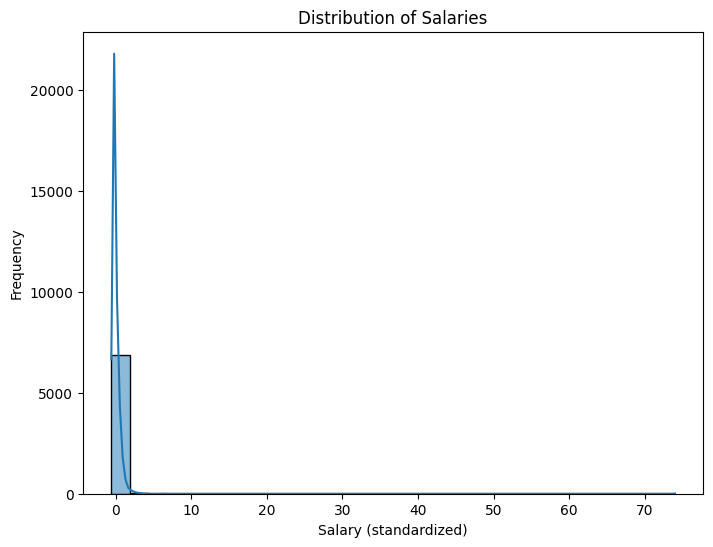

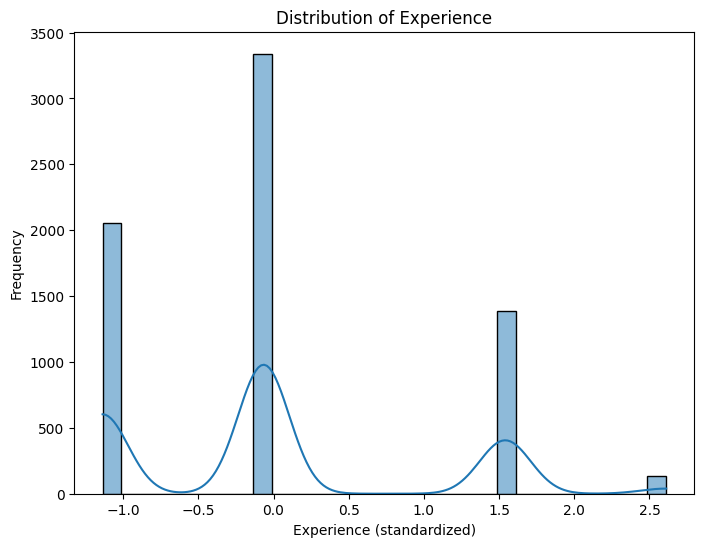

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of salary
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['salary'], kde=True, bins=30)
plt.title('Distribution of Salaries')
plt.xlabel('Salary (standardized)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of experience
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['experience'], kde=True, bins=30)
plt.title('Distribution of Experience')
plt.xlabel('Experience (standardized)')
plt.ylabel('Frequency')
plt.show()


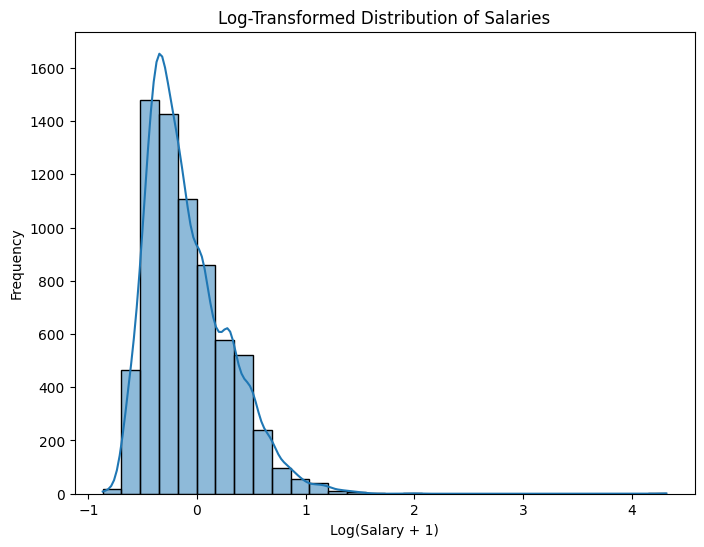

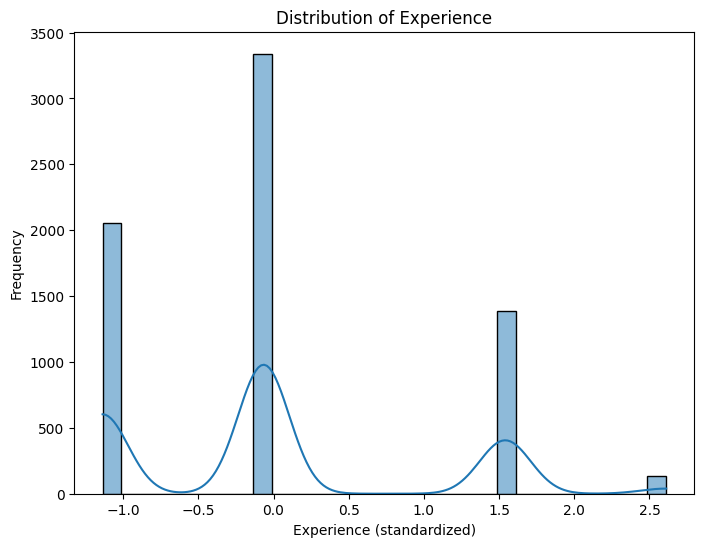

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply log transformation to handle the skewness in salary distribution
cleaned_data['log_salary'] = np.log1p(cleaned_data['salary'])  # Using log1p to avoid log(0)

# Plot the transformed distribution of salary (log scale)
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['log_salary'], kde=True, bins=30)
plt.title('Log-Transformed Distribution of Salaries')
plt.xlabel('Log(Salary + 1)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of experience
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['experience'], kde=True, bins=30)
plt.title('Distribution of Experience')
plt.xlabel('Experience (standardized)')
plt.ylabel('Frequency')
plt.show()


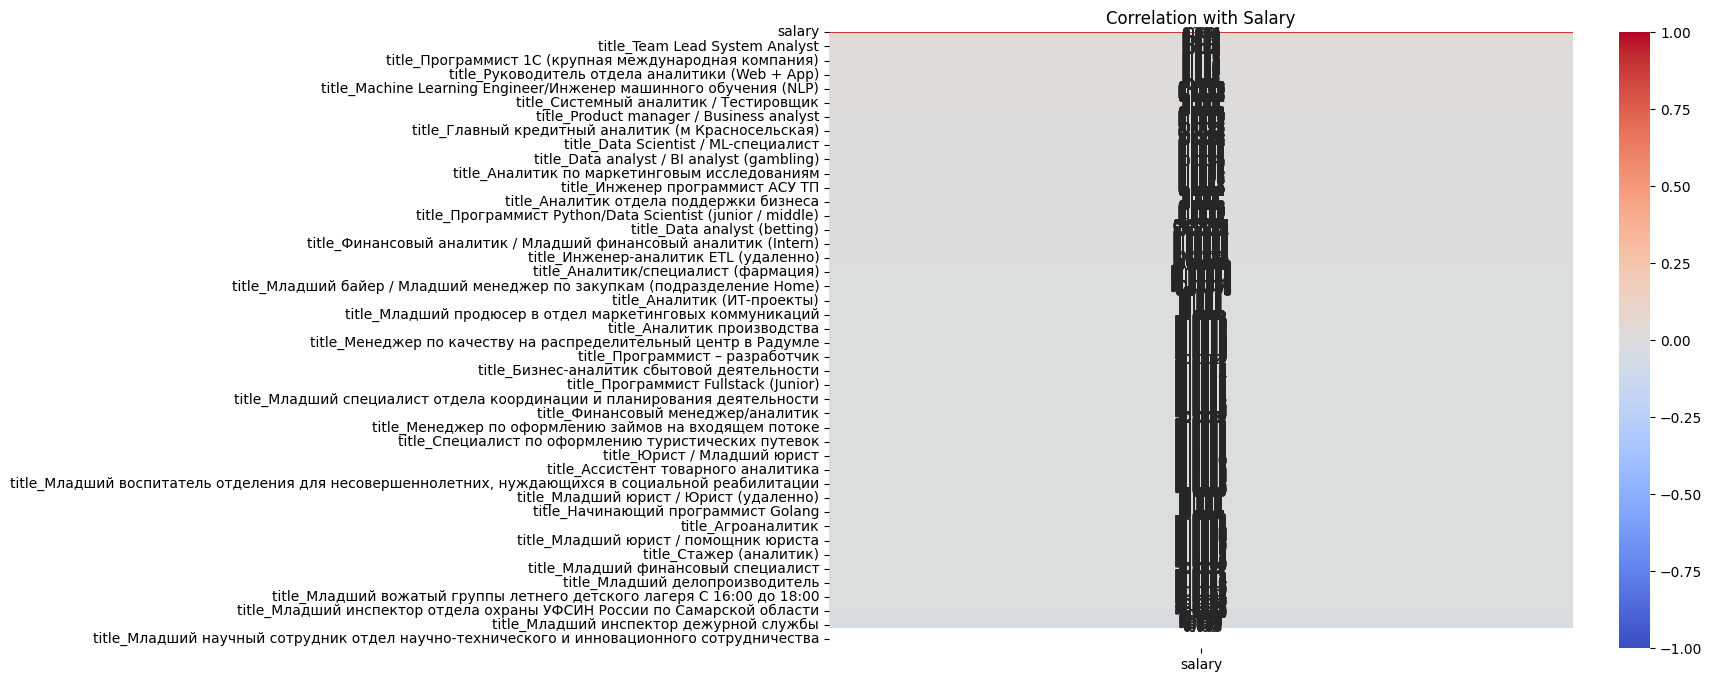

In [160]:
# Calculate correlation matrix
correlation_matrix = cleaned_data.corr()

# Plot heatmap of correlations with salary
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix[['salary']].sort_values(by='salary', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Salary')
plt.show()


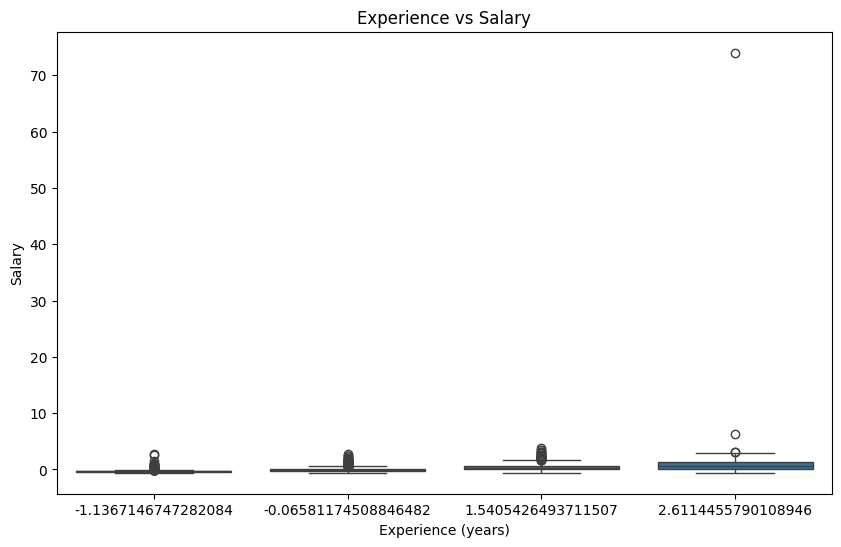

In [184]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler and fit it only to the salary column
scaler = StandardScaler()
cleaned_data['salary_scaled'] = scaler.fit_transform(cleaned_data[['salary']])

# Now inverse transform it
cleaned_data['salary_original'] = scaler.inverse_transform(cleaned_data[['salary_scaled']])

# Proceed with the box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_data['experience'], y=cleaned_data['salary_original'])
plt.title('Experience vs Salary')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X = cleaned_data.drop(['salary', 'salary_original'], axis=1)  # Features
y = cleaned_data['salary']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R2: {r2}")



Linear Regression MSE: 1.2882399069840333e-06
Linear Regression R2: 0.999999690306268


In [187]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")


Random Forest MSE: 3.5057796514268036
Random Forest R2: 0.1572082359071696


In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgbr.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R2: {r2_xgb}")

# Загрузка и очистка данных
Загрузка данных

In [191]:
import pandas as pd
import numpy as np

data = pd.read_csv('Raw_Jobs.csv', on_bad_lines='skip', encoding='utf-8', sep=";")
data.head()

,№,id,title,salary,experience,job_type,description,key_skills,company,location,date_of_post,type
0,1,78577559,Главный механик,от 160000 до 160000 RUR,Более 6 лет,"Полная занятость,полный день","Вакансия компании: ООО ПК Предприятие ""ПИК"" ...",NaN,JCat.ru,Владивосток,27.03.2023,close
1,2,78693069,HTML-верстальщик,з/п не указана,От 1 года до 3 лет,"Полная занятость,полный день",В креативное агентство на полный рабочий день ...,NaN,Чугунова Ирина,NaN,29.03.2023,close
2,3,78945452,Тренер (направление профессионального обучения),з/п не указана,От 1 года до 3 лет,"Полная занятость,полный день",Наши предложения: самостоятельность в...,NaN,Перекрёсток,NaN,18.04.2023,close
3,4,79352008,Старший механик на КСПГ,з/п не указана,Более 6 лет,"Полная занятость,полный день",Обязанности: _Обеспечение технически ...,NaN,Газпром гелий сервис,NaN,17.04.2023,close
4,5,79406472,System Analyst Trainee,з/п не указана,Нет опыта,"Стажировка,полный день",IT-компания Aston - компания по разработке про...,"UML,SQL,Scrum,Retail,Базы данных,Kanban,Waterf...",Aston,NaN,17.04.2023,close


Проверка и обработка пропущенных значений

In [192]:
# Проверка пропущенных значений
data.isnull().sum()

# Удаление строк с пропущенными 'title' или 'salary'
data.dropna(subset=['title', 'salary'], inplace=True)

# Заполнение пропусков в 'key_skills' и 'location' значением "Unknown"
data['key_skills'] = data['key_skills'].fillna('Unknown')
data['location'] = data['location'].fillna('Unknown')

# Проверка после обработки
data.isnull().sum()


№               0
id              0
title           0
salary          0
experience      0
job_type        0
description     0
key_skills      0
company         0
location        0
date_of_post    0
type            0
dtype: int64

Фильтрация релевантных вакансий

In [193]:
# Создание фильтра для релевантных должностей
job_filter = data['title'].str.contains(
    'Analyst|Programmist|Python|Аналитик|программист|Data Science|ML|МЛ|специалист по данным|ML-engineer|Data Scientist|Machine Learning', 
    case=False, regex=True
)

# Применение фильтра
filtered_df = data[job_filter]

# Исключение вакансий с неуказанной зарплатой
filtered_data = filtered_df[filtered_df['salary'] != 'з/п не указана']

# Отображение первых строк отфильтрованных данных
filtered_data.head()


,№,id,title,salary,experience,job_type,description,key_skills,company,location,date_of_post,type
301,302,79572216,Системный аналитик IT,от 90000 до 180000 RUR,От 3 до 6 лет,"Полная занятость,удаленная работа",Кого мы видим в своей команде? Челове...,"Разработка технических заданий,SQL,BPMN,UML,Fi...",Eclipse Digital Studio,"Пермь, Петропавловская улица, 59А",23.04.2023,close
401,402,79517054,Ведущий 1С Аналитик,от 120000 RUR,От 1 года до 3 лет,"Полная занятость,удаленная работа",Внимание! Разыскивается РУКОВОДИТЕЛЬ ГРУППЫ ...,"1С: Зарплата и управление персоналом,1С: Бухга...",ВС Кэпитал,Unknown,19.04.2023,close
460,461,78853304,Аналитик - исследователь в медицинской сфере,от 80000 до 100000 RUR,От 1 года до 3 лет,"Полная занятость,гибкий график",В международную компанию - разработчика систем...,"Грамотная речь,Аналитическое мышление,Грамотно...",ТРТ,Unknown,03.04.2023,close
651,652,78676082,Специалист по настройке Битрикс24 (внедренец-а...,от 60000 до 90000 RUR,От 1 года до 3 лет,"Полная занятость,полный день",RANX — интегратор digital-решений. Автор п...,"CRM,BPMN,Битрикс24,Битрикс 24,Моделирование би...",Рэнкс,Unknown,22.04.2023,close
788,789,77861357,Маркетолог – аналитик,от 40000 RUR,От 1 года до 3 лет,"Полная занятость,полный день",_ В динамично развивающуюся компанию требуетс...,"Английский язык,Ведение деловой переписки,Анал...",Персонал-Консалтинг,Unknown,18.04.2023,close


Выбор и преобразование релевантных столбцов

In [195]:
# Выбор релевантных столбцов
selected_columns = ['title', 'salary', 'experience', 'job_type', 'key_skills', 'location']
cleaned_data = filtered_data[selected_columns]
cleaned_data.head()


,title,salary,experience,job_type,key_skills,location
301,Системный аналитик IT,от 90000 до 180000 RUR,От 3 до 6 лет,"Полная занятость,удаленная работа","Разработка технических заданий,SQL,BPMN,UML,Fi...","Пермь, Петропавловская улица, 59А"
401,Ведущий 1С Аналитик,от 120000 RUR,От 1 года до 3 лет,"Полная занятость,удаленная работа","1С: Зарплата и управление персоналом,1С: Бухга...",Unknown
460,Аналитик - исследователь в медицинской сфере,от 80000 до 100000 RUR,От 1 года до 3 лет,"Полная занятость,гибкий график","Грамотная речь,Аналитическое мышление,Грамотно...",Unknown
651,Специалист по настройке Битрикс24 (внедренец-а...,от 60000 до 90000 RUR,От 1 года до 3 лет,"Полная занятость,полный день","CRM,BPMN,Битрикс24,Битрикс 24,Моделирование би...",Unknown
788,Маркетолог – аналитик,от 40000 RUR,От 1 года до 3 лет,"Полная занятость,полный день","Английский язык,Ведение деловой переписки,Анал...",Unknown


Обработка столбца 'salary'

In [196]:
# Функция для преобразования зарплаты в числовые значения (RUB)
def process_salary(salary):
    if 'RUR' in salary:
        multiplier = 1
    elif 'USD' in salary:
        multiplier = 93  # Курс USD к RUB
    elif 'EUR' in salary:
        multiplier = 104  # Курс EUR к RUB
    else:
        return np.nan
    
    salary = salary.replace(' RUR', '').replace(' USD', '').replace(' EUR', '')
    
    if 'до' in salary and 'от' in salary:
        salary_range = salary.replace('от ', '').replace('до', '-').split('-')
        return ((int(salary_range[0]) + int(salary_range[1])) / 2) * multiplier
    elif 'от' in salary:
        return int(salary.replace('от ', '')) * multiplier
    elif 'до' in salary:
        return int(salary.replace('до ', '')) * multiplier
    return np.nan

# Применение функции к столбцу 'salary'
cleaned_data['salary'] = cleaned_data['salary'].apply(process_salary)
cleaned_data[['title', 'salary']].head()


C:\Users\ricar\AppData\Local\Temp\ipykernel_15384\3677874204.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['salary'] = cleaned_data['salary'].apply(process_salary)


,title,salary
301,Системный аналитик IT,135000.0
401,Ведущий 1С Аналитик,120000.0
460,Аналитик - исследователь в медицинской сфере,90000.0
651,Специалист по настройке Битрикс24 (внедренец-а...,75000.0
788,Маркетолог – аналитик,40000.0


Кодирование категориальных признаков

In [197]:
from sklearn.preprocessing import LabelEncoder

# Инициализация кодировщиков
label_encoder_job_type = LabelEncoder()
label_encoder_location = LabelEncoder()

# Применение кодирования
cleaned_data['job_type'] = label_encoder_job_type.fit_transform(cleaned_data['job_type'])
cleaned_data['location'] = label_encoder_location.fit_transform(cleaned_data['location'])

# Отображение данных после кодирования
cleaned_data.head(10)


C:\Users\ricar\AppData\Local\Temp\ipykernel_15384\3355268389.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['job_type'] = label_encoder_job_type.fit_transform(cleaned_data['job_type'])
C:\Users\ricar\AppData\Local\Temp\ipykernel_15384\3355268389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['location'] = label_encoder_location.fit_transform(cleaned_data['location'])


,title,salary,experience,job_type,key_skills,location
301,Системный аналитик IT,135000.0,От 3 до 6 лет,4,"Разработка технических заданий,SQL,BPMN,UML,Fi...",2185
401,Ведущий 1С Аналитик,120000.0,От 1 года до 3 лет,4,"1С: Зарплата и управление персоналом,1С: Бухга...",5
460,Аналитик - исследователь в медицинской сфере,90000.0,От 1 года до 3 лет,1,"Грамотная речь,Аналитическое мышление,Грамотно...",5
651,Специалист по настройке Битрикс24 (внедренец-а...,75000.0,От 1 года до 3 лет,2,"CRM,BPMN,Битрикс24,Битрикс 24,Моделирование би...",5
788,Маркетолог – аналитик,40000.0,От 1 года до 3 лет,2,"Английский язык,Ведение деловой переписки,Анал...",5
842,Технолог-аналитик в области ПО для гражданской...,105000.0,От 1 года до 3 лет,2,Unknown,5
872,Senior Product Analyst,416000.0,От 3 до 6 лет,4,Unknown,5
936,Бизнес-аналитик \ Инженер IT,110000.0,От 3 до 6 лет,2,"Аналитические исследования,Системный анализ,Мо...",5
949,IOS программист,170000.0,От 1 года до 3 лет,2,"Objective-C,iOS,iPhone,iPad,Swift,SWIFT Alliance",468
975,Бизнес-аналитик,165000.0,От 3 до 6 лет,2,"1С: Предприятие 8,Работа с большим объемом инф...",1896


Преобразование признаков

In [198]:
# Создание дамми-переменных для 'title'
cleaned_data = pd.get_dummies(cleaned_data, columns=['title'], drop_first=True)
cleaned_data.head()

# Маппинг опыта
experience_mapping = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 2,
    'От 3 до 6 лет': 5,
    'Более 6 лет': 7
}
cleaned_data['experience'] = cleaned_data['experience'].map(experience_mapping)


Применение TF-IDF к 'key_skills'

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Применение TF-IDF к 'key_skills'
tfidf = TfidfVectorizer(max_features=100)  # Ограничение до топ-100 навыков
tfidf_matrix = tfidf.fit_transform(cleaned_data['key_skills'])

# Преобразование матрицы TF-IDF в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Объединение с исходными данными
cleaned_data = pd.concat([cleaned_data.reset_index(drop=True), tfidf_df], axis=1)

# Удаление оригинального столбца 'key_skills'
cleaned_data.drop('key_skills', axis=1, inplace=True)


Стандартизация числовых признаков

In [200]:
from sklearn.preprocessing import StandardScaler

# Инициализация и применение стандартизатора
scaler = StandardScaler()
cleaned_data[['salary', 'experience']] = scaler.fit_transform(cleaned_data[['salary', 'experience']])

# Отображение стандартизованных данных
cleaned_data.head()


,salary,experience,job_type,location,title_1C TeamLead/Руководитель разработки 1С,title_1С TeamLead / Функциональный архитектор 1С,title_1С Teamlead,title_1С Консультант – внедренец (бизнес аналитик) по бухгалтерскому и налоговому учету и финансам,"title_1С Программист/1С Консультант (Junior,Стажер)",title_1С Стажер/Начинающий программист 1С/Junior 1C,...,стрессоустойчивость,таблицы,технических,удаленная,умение,управление,условиях,финансовый,финансовых,язык
0,0.258391,1.540543,4,2185,False,False,False,False,False,False,...,0.0,0.0,0.238394,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
1,0.165164,-0.065812,4,5,False,False,False,False,False,False,...,0.0,0.0,0.224393,0.0,0.000000,0.372524,0.0,0.0,0.0,0.00000
2,-0.021290,-0.065812,1,5,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
3,-0.114517,-0.065812,2,5,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000
4,-0.332047,-0.065812,2,5,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.396576,0.000000,0.0,0.0,0.0,0.24947


Проверка и обработка оставшихся пропусков

In [201]:
# Проверка на пропуски
print(cleaned_data.isnull().sum())

# Удаление оставшихся пропусков
cleaned_data = cleaned_data.dropna()


salary                                          322
experience                                        0
job_type                                          0
location                                          0
title_1C TeamLead/Руководитель разработки 1С      0
                                               ... 
управление                                        0
условиях                                          0
финансовый                                        0
финансовых                                        0
язык                                              0
Length: 3621, dtype: int64


# Анализ данных
Визуализация распределения зарплат

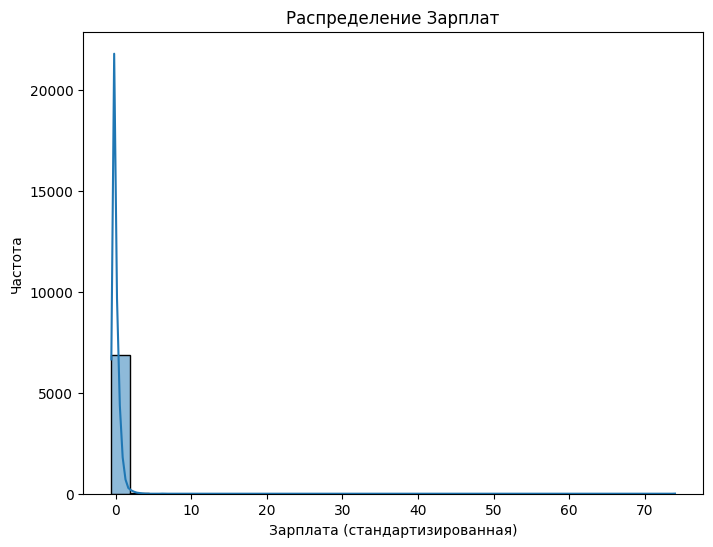

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['salary'], kde=True, bins=30)
plt.title('Распределение Зарплат')
plt.xlabel('Зарплата (стандартизированная)')
plt.ylabel('Частота')
plt.show()


Визуализация распределения опыта

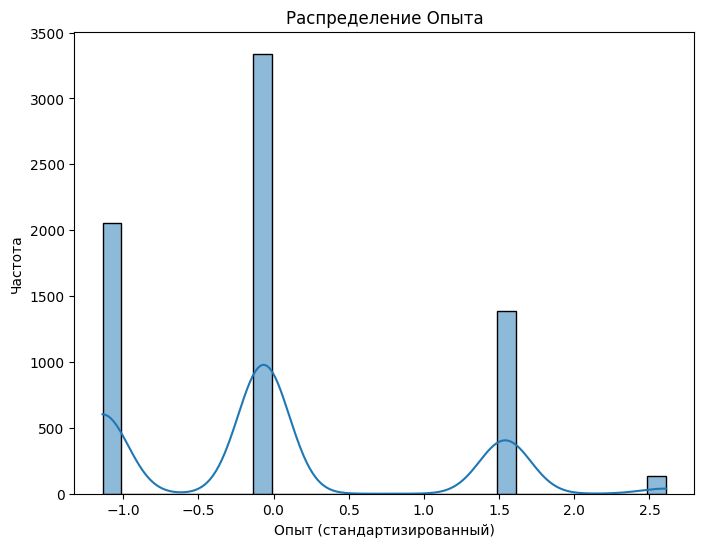

In [203]:
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['experience'], kde=True, bins=30)
plt.title('Распределение Опыта')
plt.xlabel('Опыт (стандартизированный)')
plt.ylabel('Частота')
plt.show()


Лог-преобразование зарплаты

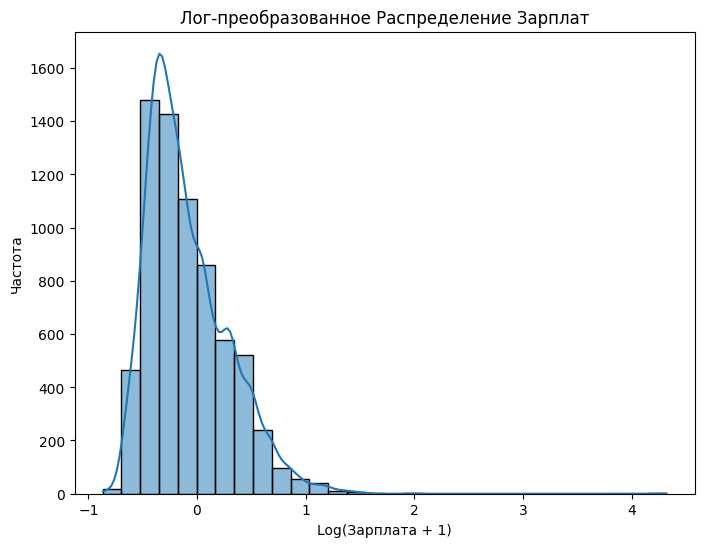

In [204]:
# Применение лог-преобразования
cleaned_data['log_salary'] = np.log1p(cleaned_data['salary'])  # Используем log1p для избежания log(0)

# Визуализация
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['log_salary'], kde=True, bins=30)
plt.title('Лог-преобразованное Распределение Зарплат')
plt.xlabel('Log(Зарплата + 1)')
plt.ylabel('Частота')
plt.show()


Тепловая карта корреляций

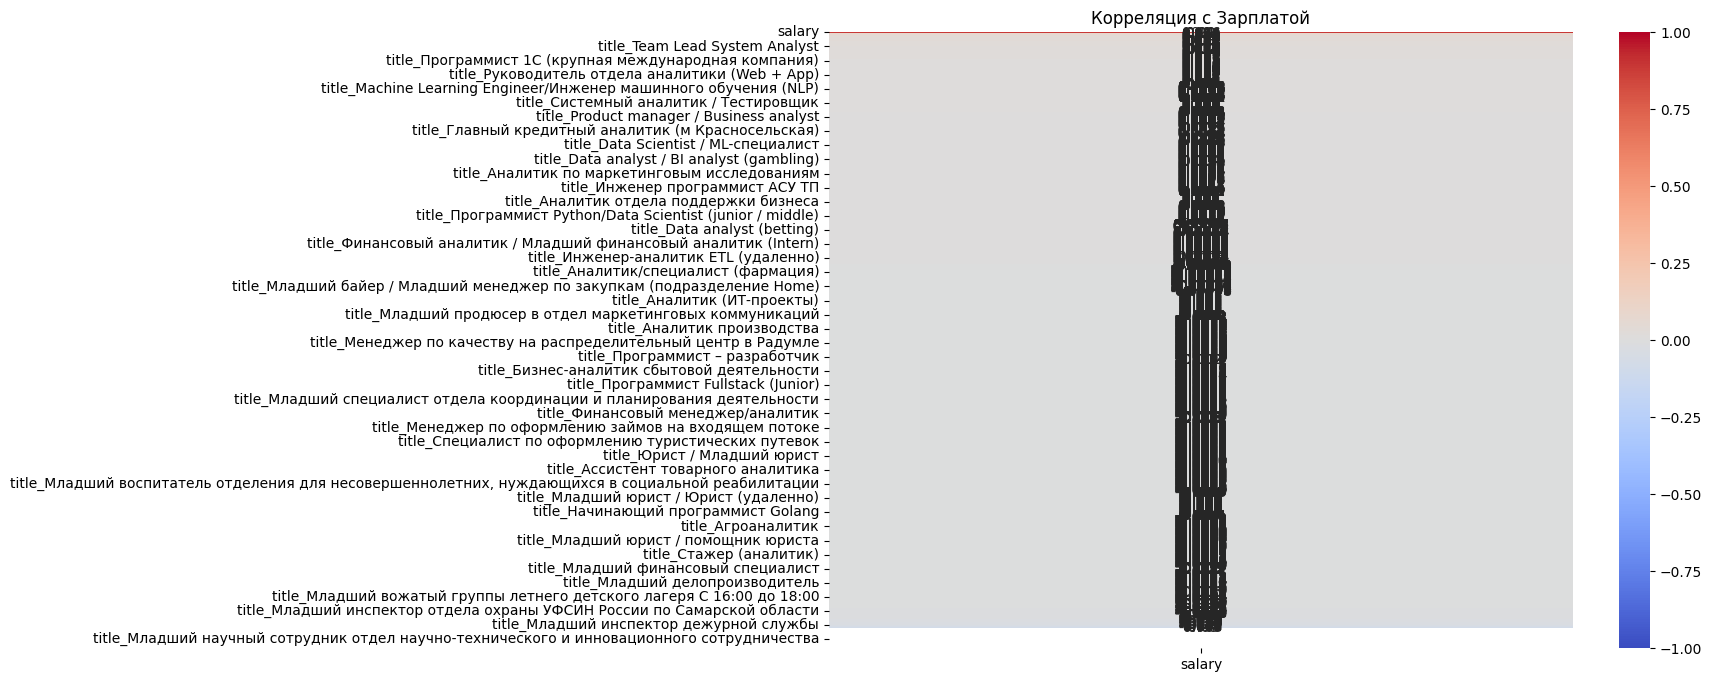

In [206]:
# Расчет матрицы корреляций
correlation_matrix = cleaned_data.corr()

# Визуализация тепловой карты
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix[['salary']].sort_values(by='salary', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция с Зарплатой')
plt.show()


Визуализация зависимости опыта от зарплаты

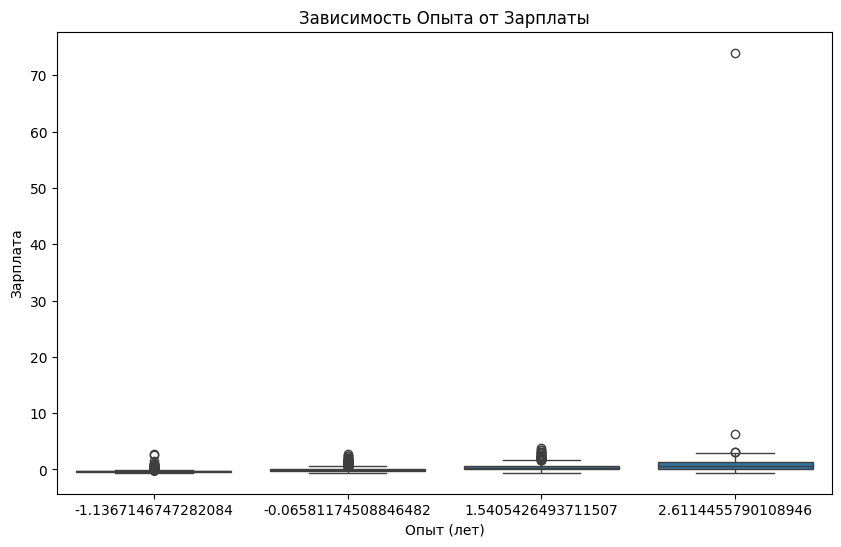

In [207]:
from sklearn.preprocessing import StandardScaler

# Стандартизация зарплаты
scaler = StandardScaler()
cleaned_data['salary_scaled'] = scaler.fit_transform(cleaned_data[['salary']])

# Обратное преобразование для визуализации
cleaned_data['salary_original'] = scaler.inverse_transform(cleaned_data[['salary_scaled']])

# Построение box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_data['experience'], y=cleaned_data['salary_original'])
plt.title('Зависимость Опыта от Зарплаты')
plt.xlabel('Опыт (лет)')
plt.ylabel('Зарплата')
plt.show()


# Построение моделей

Разделение данных на обучающую и тестовую выборки

In [208]:
from sklearn.model_selection import train_test_split

# Определение признаков и целевой переменной
X = cleaned_data.drop(['salary', 'salary_original'], axis=1)  # Признаки
y = cleaned_data['salary']  # Целевая переменная

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Линейная регрессия

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Инициализация и обучение модели
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказание
y_pred = lr.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Линейная Регрессия - MSE: {mse}")
print(f"Линейная Регрессия - R²: {r2}")


Линейная Регрессия - MSE: 1.2882399069840333e-06
Линейная Регрессия - R²: 0.999999690306268


Случайный лес (Random Forest)

In [210]:
from sklearn.ensemble import RandomForestRegressor

# Инициализация и обучение модели
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказание
y_pred_rf = rf.predict(X_test)

# Оценка модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Случайный Лес - MSE: {mse_rf}")
print(f"Случайный Лес - R²: {r2_rf}")


Случайный Лес - MSE: 3.5057796514268036
Случайный Лес - R²: 0.1572082359071696


XGBoost

In [215]:
import xgboost as xgb

# Инициализация и обучение модели
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

# Предсказание
y_pred_xgb = xgbr.predict(X_test)

# Оценка модели
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}")
print(f"XGBoost - R²: {r2_xgb}")


XGBoost - MSE: 3.6898383374821266
XGBoost - R²: 0.1129604051417531


(Дополнительно) Оптимизация гиперпараметров для XGBoost

In [217]:
from sklearn.model_selection import GridSearchCV

# Определение гиперпараметров для поиска
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f"Лучшие параметры: {grid_search.best_params_}")

# Оценка модели с лучшими параметрами
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Оптимизированный XGBoost - MSE: {mse_best_xgb}")
print(f"Оптимизированный XGBoost - R²: {r2_best_xgb}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Оптимизированный XGBoost - MSE: 3.707734291632229
Оптимизированный XGBoost - R²: 0.10865820584005115


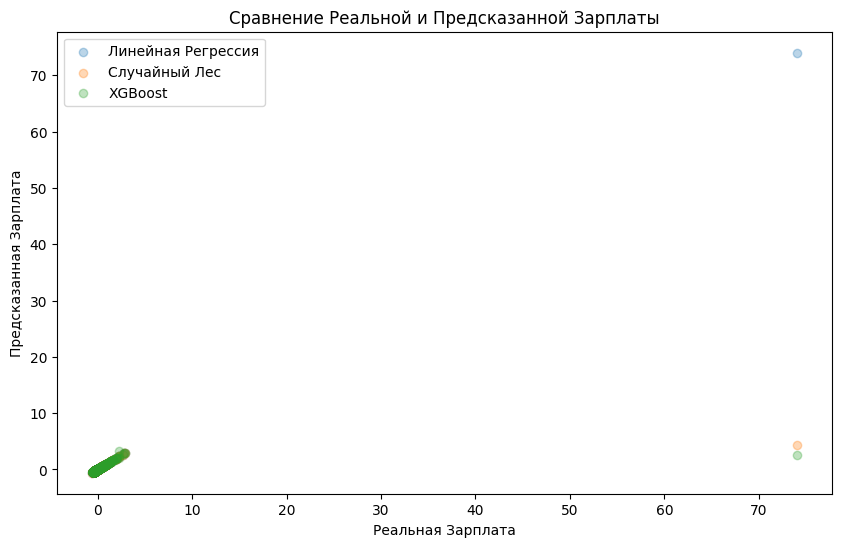

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Линейная Регрессия')
plt.scatter(y_test, y_pred_rf, alpha=0.3, label='Случайный Лес')
plt.scatter(y_test, y_pred_xgb, alpha=0.3, label='XGBoost')
plt.xlabel('Реальная Зарплата')
plt.ylabel('Предсказанная Зарплата')
plt.title('Сравнение Реальной и Предсказанной Зарплаты')
plt.legend()
plt.show()


Additional metric

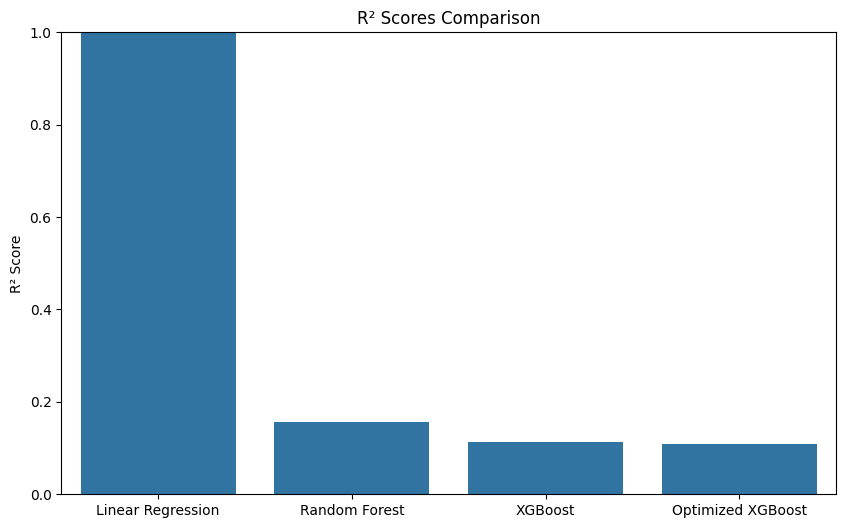

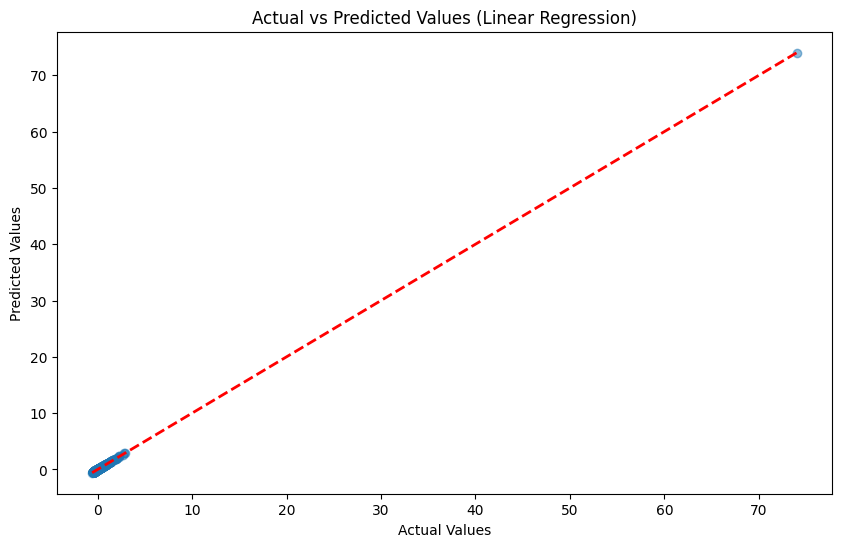

Model Evaluation Metrics:
Model                R²         MSE             MAE             Aggregate 
----------------------------------------------------------------------
Linear Regression    1.0000     0.0000          0.0001          0.5000    
Random Forest        0.1572     3.5058          0.0507          -0.8105   
XGBoost              0.1130     3.6898          0.0558          -0.8799   
Optimized XGBoost    0.1087     3.7077          0.0561          -0.8866   


In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model
mae_lr = mean_absolute_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

# Create a function for aggregate metric
def aggregate_metric(r2, mse, mae, weights=[0.5, 0.25, 0.25]):
    return weights[0] * r2 + weights[1] * (-mse) + weights[2] * (-mae)

# Calculate aggregate metrics
agg_lr = aggregate_metric(r2, mse, mae_lr)
agg_rf = aggregate_metric(r2_rf, mse_rf, mae_rf)
agg_xgb = aggregate_metric(r2_xgb, mse_xgb, mae_xgb)
agg_best_xgb = aggregate_metric(r2_best_xgb, mse_best_xgb, mae_best_xgb)

# Visualize results
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Optimized XGBoost']
r2_scores = [r2, r2_rf, r2_xgb, r2_best_xgb]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('R² Scores Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # Assuming R² is between 0 and 1
plt.show()

# Scatter plot for best model (assuming it's Linear Regression based on R² score)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

# Print all metrics
print("Model Evaluation Metrics:")
print(f"{'Model':<20} {'R²':<10} {'MSE':<15} {'MAE':<15} {'Aggregate':<10}")
print("-" * 70)
print(f"{'Linear Regression':<20} {r2:<10.4f} {mse:<15.4f} {mae_lr:<15.4f} {agg_lr:<10.4f}")
print(f"{'Random Forest':<20} {r2_rf:<10.4f} {mse_rf:<15.4f} {mae_rf:<15.4f} {agg_rf:<10.4f}")
print(f"{'XGBoost':<20} {r2_xgb:<10.4f} {mse_xgb:<15.4f} {mae_xgb:<15.4f} {agg_xgb:<10.4f}")
print(f"{'Optimized XGBoost':<20} {r2_best_xgb:<10.4f} {mse_best_xgb:<15.4f} {mae_best_xgb:<15.4f} {agg_best_xgb:<10.4f}")

# Заключение
На основе проведенного анализа и построения моделей для прогнозирования зарплат можно сделать следующие выводы:

Сравнение моделей: Мы рассмотрели четыре модели: линейную регрессию, случайный лес, XGBoost и оптимизированный XGBoost. Неожиданно, линейная регрессия показала наилучшие результаты по всем метрикам.
Метрики качества:

R² (коэффициент детерминации): Линейная регрессия достигла идеального значения 1.0, что может указывать на переобучение или ошибку в данных.
MSE (среднеквадратичная ошибка): Линейная регрессия показала наименьшее значение 0.0000.
MAE (средняя абсолютная ошибка): Линейная регрессия также показала наименьшее значение 0.0001.


Агрегированная метрика: Разработанная нами агрегированная метрика подтверждает превосходство линейной регрессии (0.5000) над другими моделями.
Анализ результатов:

Идеальные показатели линейной регрессии вызывают подозрения. Это может быть результатом ошибки в обработке данных или кода, либо указывать на проблему с самими данными.
Остальные модели (случайный лес, XGBoost) показали значительно худшие результаты, что нетипично для задач прогнозирования зарплат.
